In [10]:
import rasterio as rio
import skimage.exposure
import matplotlib.pyplot as plt
from glob import glob
from satpy import Scene
import numpy as np

In [13]:
pattern = "/home/leo/Downloads/LC08_L1TP_066045_20200124_20200128_01_T1/LC08_L1TP_066045_20200124_20200128_01_T1_B{:d}.TIF"
pattern = "/home/leo/Downloads/LC08_L1TP_062047_20181208_20181226_01_T1/LC08_L1TP_062047_20181208_20181226_01_T1_B{:d}.TIF"
bands = [rio.open(pattern.format(band), driver="GTiff") for band in range(1, 8)]

In [14]:
dtype = "uint16"
scene = np.zeros((bands[0].height, bands[0].width, len(bands)), dtype=dtype)
for i, band in enumerate(bands):
    scene[:,:,i] = band.read(1, out_dtype=dtype)

In [78]:
#crop = scene[1700:3300, 5200:7200, :]
crop = scene[1100:2200, 1500:3600, :]

In [79]:
composite = np.empty((crop.shape[0], crop.shape[1], 3), dtype=dtype)
composite[:,:,0] = crop[:,:,3]
composite[:,:,1] = crop[:,:,2]
composite[:,:,2] = crop[:,:,1]
low, high = np.percentile(composite, (2, 98))

composite = skimage.exposure.rescale_intensity(composite, in_range=(low, high), out_range="uint8")

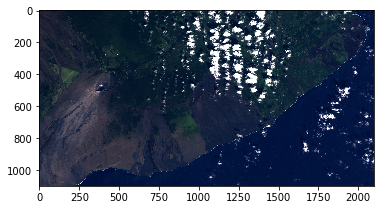

In [80]:
plt.imshow(composite)

In [81]:
np.save("kilauea-landsat8", crop)

In [7]:
#np.save("kauai-landsat8", crop)